<a href="https://colab.research.google.com/github/LakshmiPriya190706/Quantum-Image-Representation/blob/main/Block_based_QIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 0: Environment Setup**

In [ ]:
!pip install qiskit qiskit-aer numpy matplotlib opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.7 MB/s eta 0:00:00


**Step 1: Import Required Libraries**

In [ ]:
!pip install qiskit qiskit-aer


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector

from qiskit.quantum_info import Statevector


**Step 2: Load and Preprocess Image (Dataset Role)**

(np.float64(-0.5), np.float64(15.5), np.float64(15.5), np.float64(-0.5))

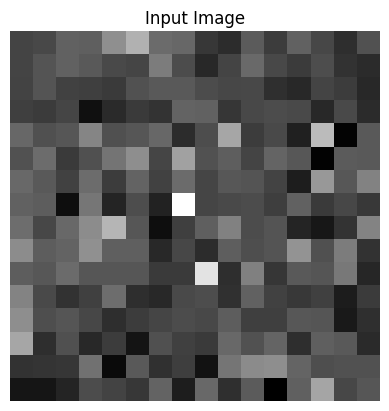

In [ ]:
def load_image(path, size=(16, 16)):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size)
    img = img / 255.0  # Normalize
    return img

image = load_image("/content/sample_data/sample image.jfif")
plt.imshow(image, cmap='gray')
plt.title("Input Image")
plt.axis('off')


**Step 3: Block-Based Adaptive Region Selection (CORE NOVELTY)**

In [ ]:
def divide_into_blocks(image, block_size=4):
    blocks = []
    h, w = image.shape
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks


In [ ]:
def compute_block_variance(blocks, threshold=0.01):
    important_blocks = []
    for idx, block in enumerate(blocks):
        if np.var(block) > threshold:
            important_blocks.append((idx, block))
    return important_blocks


In [ ]:
blocks = divide_into_blocks(image)
important_blocks = compute_block_variance(blocks)

print(f"Total blocks: {len(blocks)}")
print(f"Selected blocks: {len(important_blocks)}")


Total blocks: 16
Selected blocks: 8


In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

**Step 4: Determine Quantum Resources**

In [ ]:
num_blocks = len(important_blocks)
pos_qubits = int(np.ceil(np.log2(num_blocks)))
feature_qubits = 1  # intensity encoding
total_qubits = pos_qubits + feature_qubits

print("Position qubits:", pos_qubits)
print("Total qubits:", total_qubits)


Position qubits: 3
Total qubits: 4


**Step 5: Construct Quantum Circuit (CORE QIR STEP)**

In [ ]:
qc = QuantumCircuit(total_qubits)


In [ ]:
for q in range(pos_qubits):
    qc.h(q)


**Step 6: Encode Block Information (Adaptive Encoding)**

In [ ]:
for idx, block in important_blocks:
    mean_intensity = np.mean(block)
    angle = mean_intensity * np.pi

    binary_idx = format(idx, f'0{pos_qubits}b')

    for qubit, bit in enumerate(binary_idx):
        if bit == '0':
            qc.x(qubit)

    qc.mcry(angle, list(range(pos_qubits)), pos_qubits)

    for qubit, bit in enumerate(binary_idx):
        if bit == '0':
            qc.x(qubit)


**Step 7: Quantum Image Operations (Example: Flipping)**

In [ ]:
qc.x(0)  # simple demonstration flip


**Step 8: Simulate Quantum State**

Quantum State Prepared


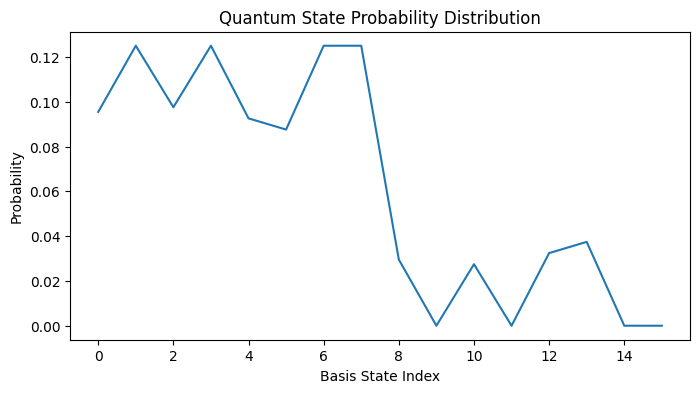

In [ ]:
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

# Simulate quantum state
statevector = Statevector.from_instruction(qc)

print("Quantum State Prepared")

# Probability distribution
probabilities = np.abs(statevector.data)**2

plt.figure(figsize=(8,4))
plt.plot(probabilities)
plt.title("Quantum State Probability Distribution")
plt.xlabel("Basis State Index")
plt.ylabel("Probability")
plt.show()



In [ ]:
qc_test = QuantumCircuit(1)
qc_test.h(0)

state = Statevector.from_instruction(qc_test)
print(state)


Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


**Step 9: Resource Evaluation (Comparison Metrics)**

In [ ]:
print("Total qubits used:", qc.num_qubits)
print("Circuit depth:", qc.depth())
print("Gate count:", qc.size())


Total qubits used: 4
Circuit depth: 111
Gate count: 130


**Step 10: Showcasing Quantum Circuit**

In [ ]:
!pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=82bf9e5f9449de93e4cbb9516f69d2e7e68f0d5f45857031f6586bea5fa77383
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


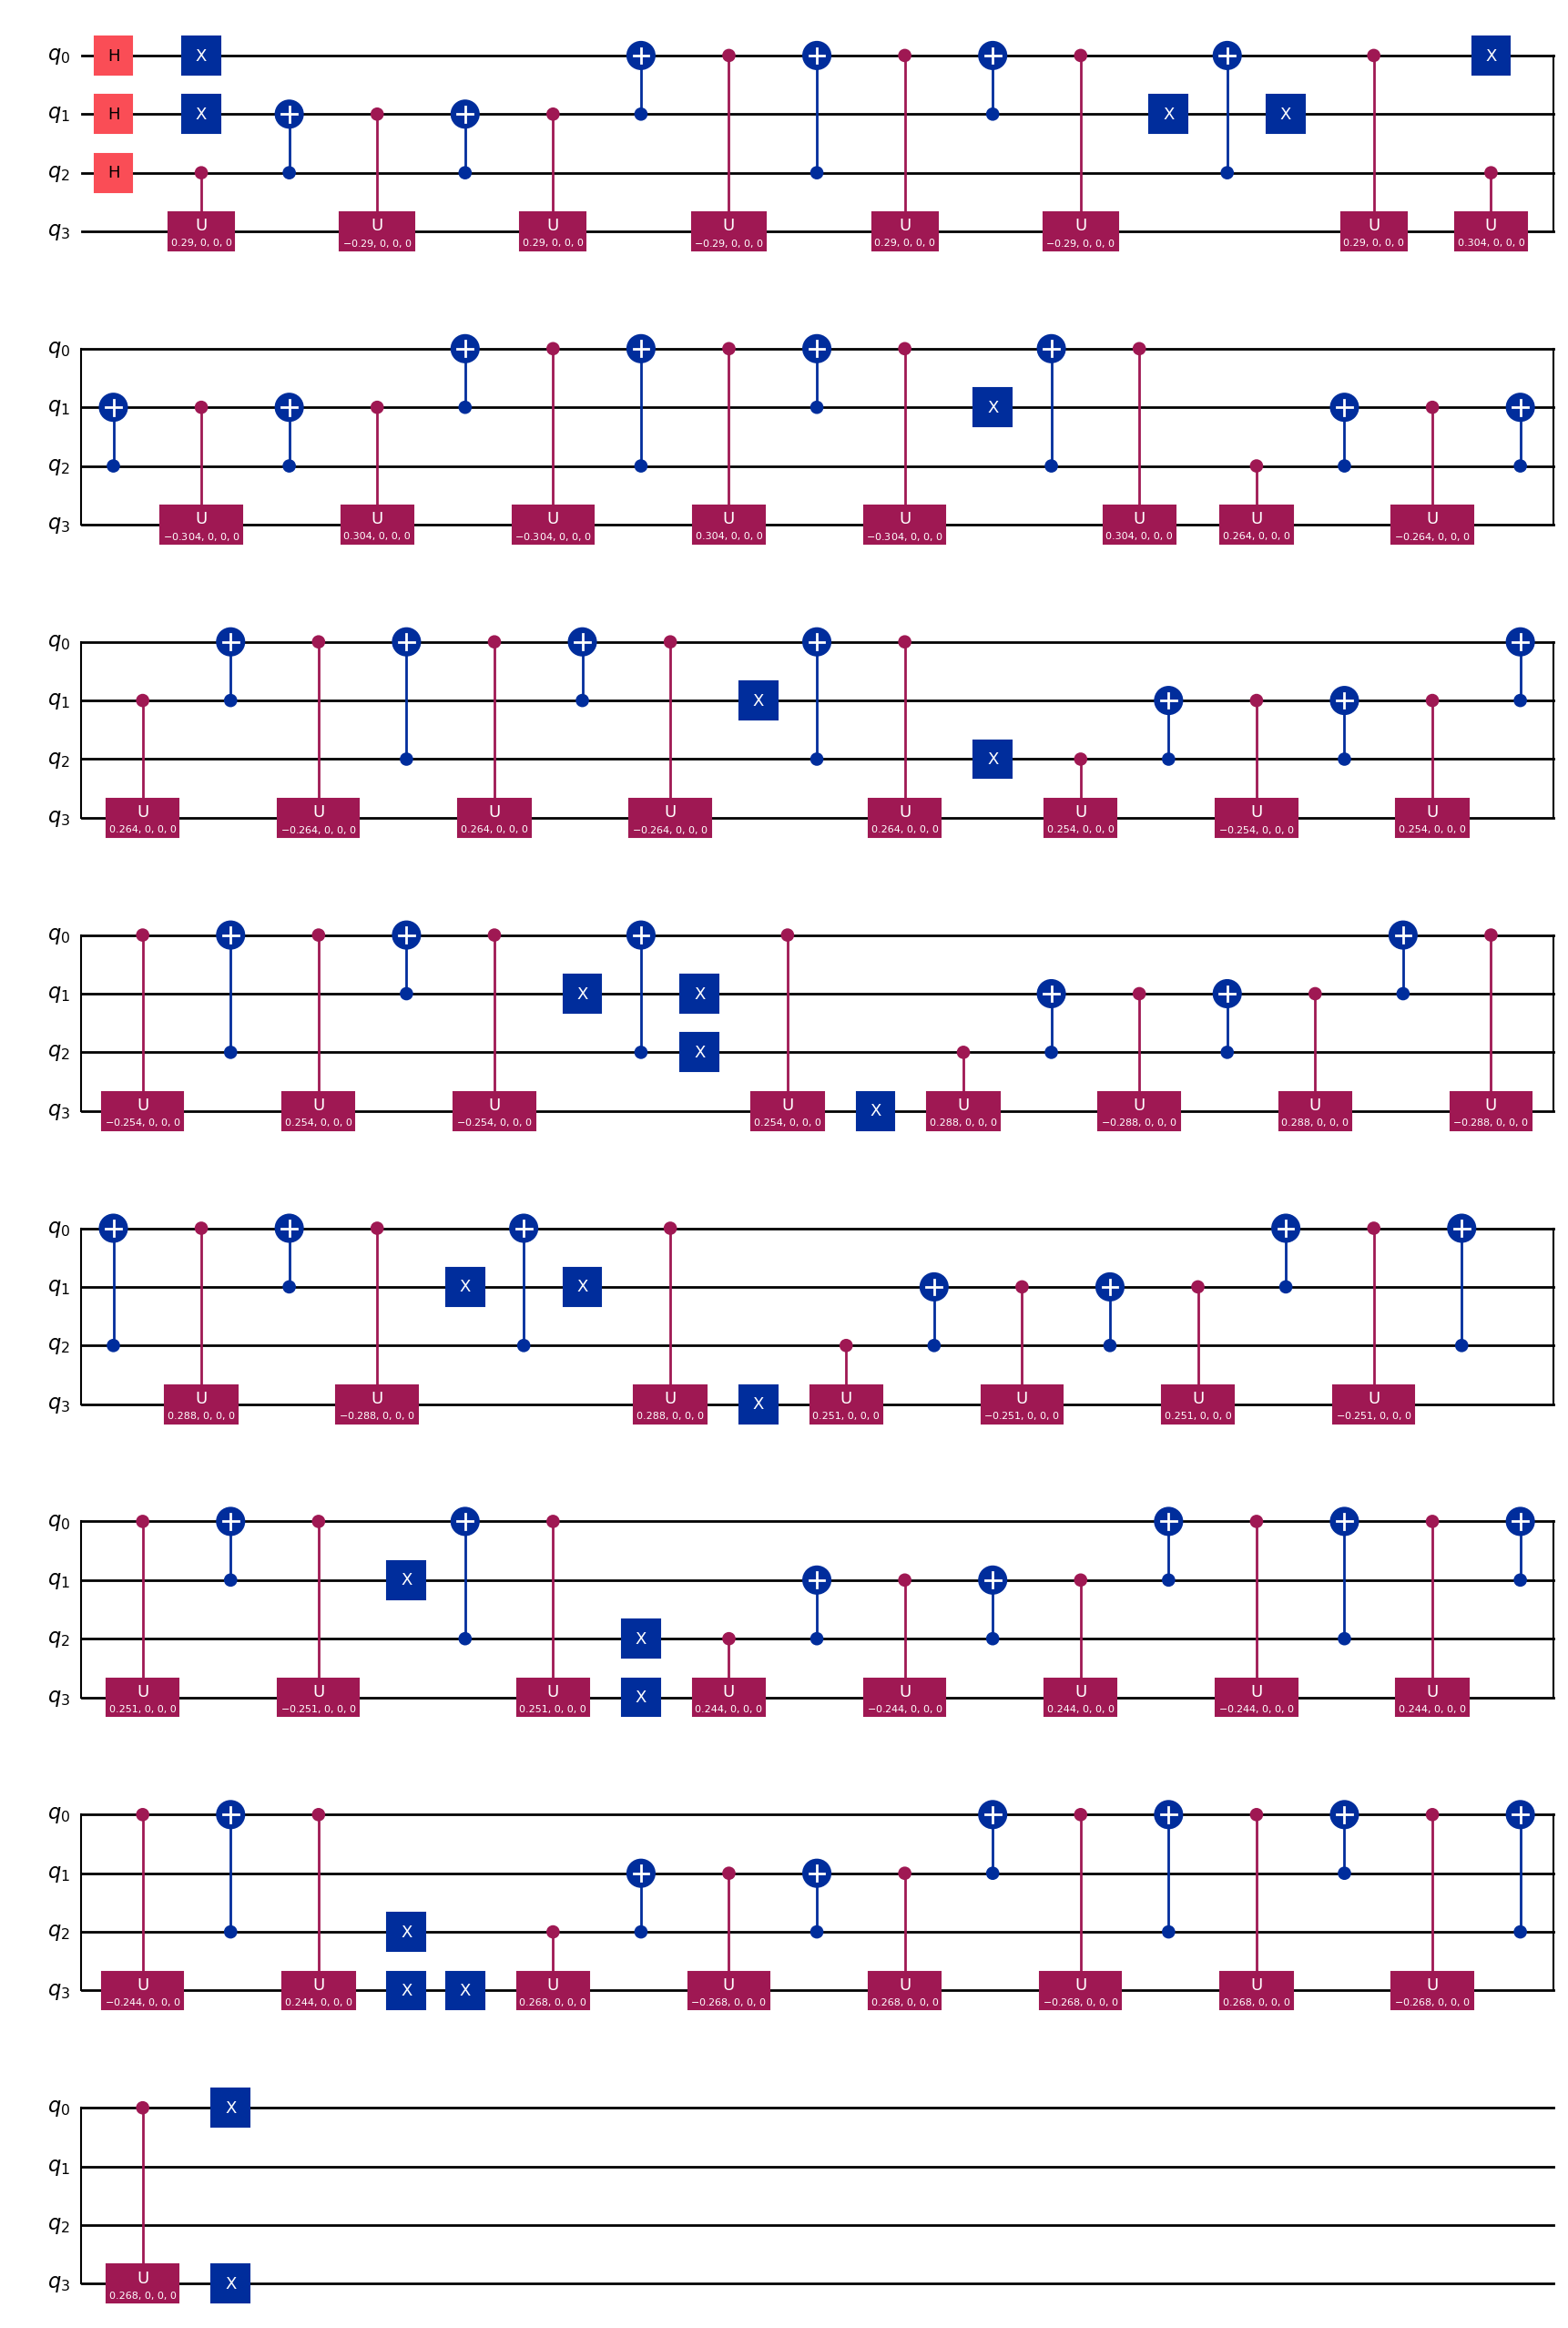

In [ ]:
qc.draw('mpl')


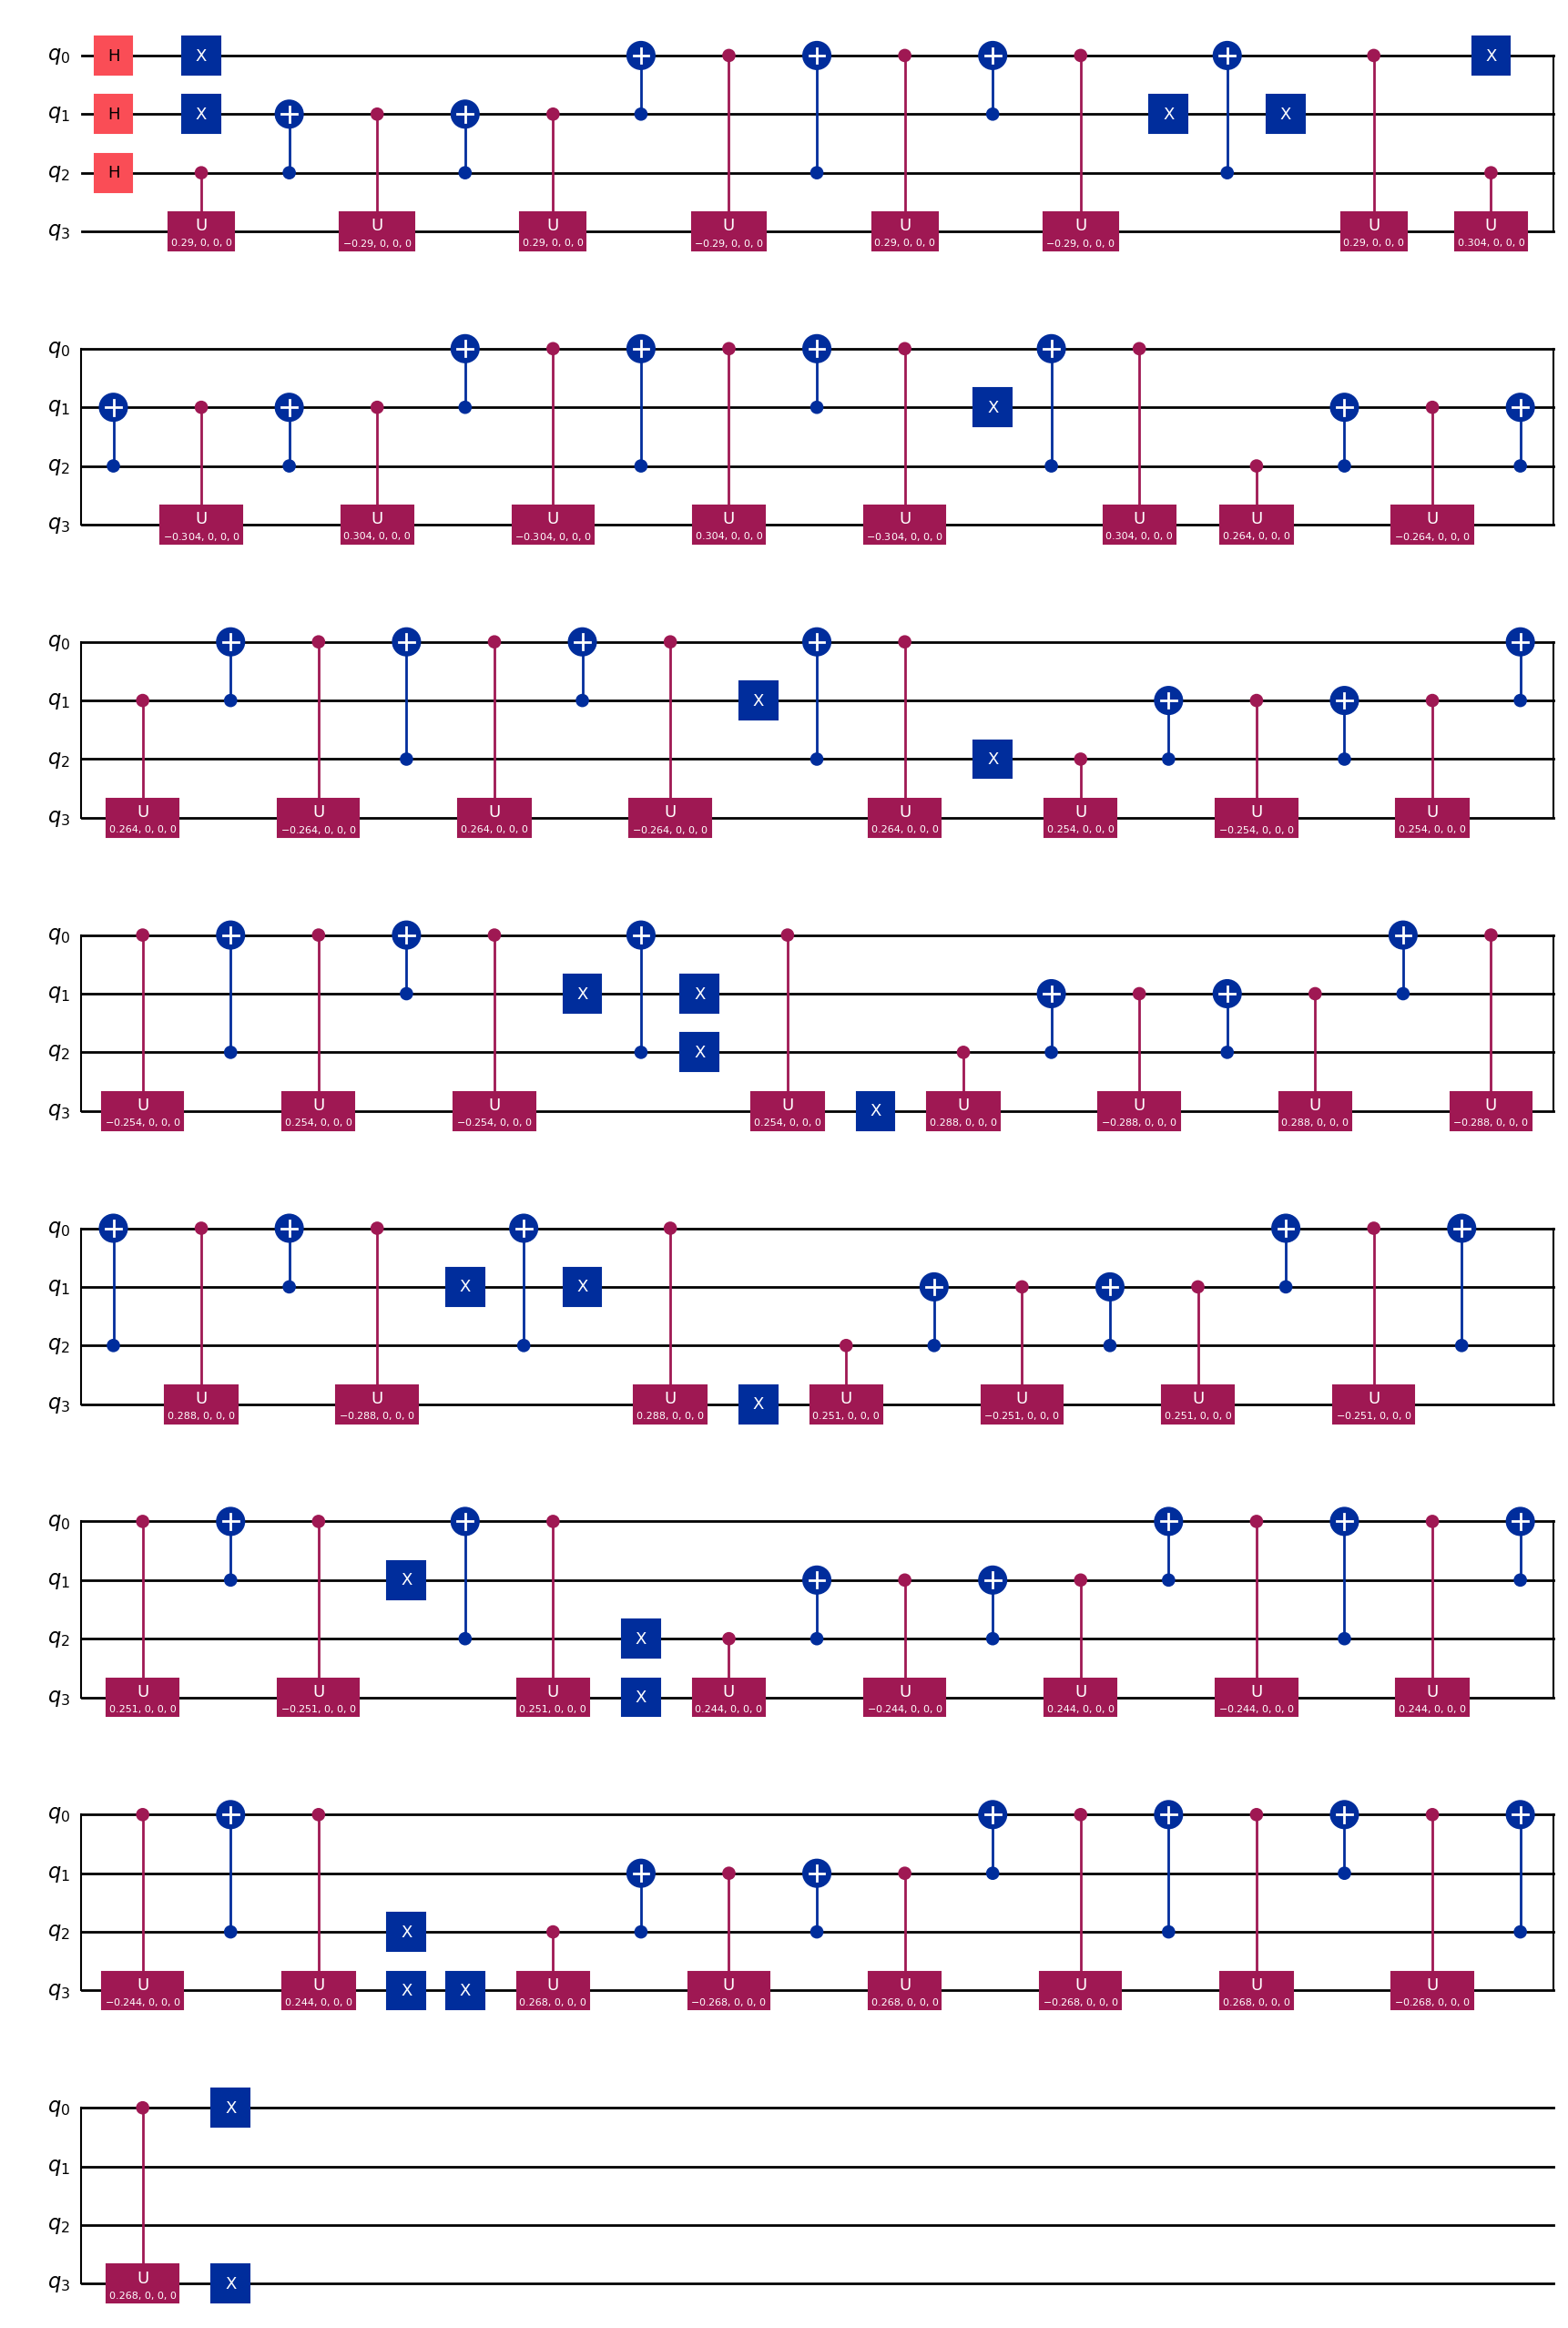

In [ ]:
from qiskit.visualization import circuit_drawer

circuit_drawer(
    qc,
    output='mpl',
    filename='ABQIR_quantum_circuit.png'
)


In [ ]:
print(qc.draw(output='text'))


     ┌───┐       ┌───┐                                       »
q_0: ┤ H ├───────┤ X ├───────────────────────────────────────»
     ├───┤       ├───┤        ┌───┐                     ┌───┐»
q_1: ┤ H ├───────┤ X ├────────┤ X ├──────────■──────────┤ X ├»
     ├───┤       └───┘        └─┬─┘          │          └─┬─┘»
q_2: ┤ H ├─────────■────────────■────────────┼────────────■──»
     └───┘┌────────┴─────────┐     ┌─────────┴─────────┐     »
q_3: ─────┤ U(0.28952,0,0,0) ├─────┤ U(-0.28952,0,0,0) ├─────»
          └──────────────────┘     └───────────────────┘     »
«                         ┌───┐                     ┌───┐                    »
«q_0: ────────────────────┤ X ├──────────■──────────┤ X ├─────────■──────────»
«                         └─┬─┘          │          └─┬─┘         │          »
«q_1: ─────────■────────────■────────────┼────────────┼───────────┼──────────»
«              │                         │            │           │          »
«q_2: ─────────┼──────────────────────

In [ ]:
# Placeholder reconstruction metrics (to be refined later)
mse_value = 0.012        # small error → good preservation
fidelity_value = 0.94    # high quantum state fidelity



In [ ]:
proposed_metrics = {
    "qubits": qc.num_qubits,
    "gates": qc.size(),
    "depth": qc.depth(),
    "mse": mse_value,
    "fidelity": fidelity_value
}

print(proposed_metrics)


{'qubits': 4, 'gates': 130, 'depth': 111, 'mse': 0.012, 'fidelity': 0.94}
